# Analyze DESeq2-called differential genes in the Human cell-line ABCD1 knockout experiment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
human = pd.read_csv('DESeq2/Human_NT_vs_ABCD1_DESeq2_results.tsv', sep='\t', header=None, names=['GeneID', 'Base mean','log2(FC)','StdErr','Wald-Stats','P-value','P-adj'])
human['log2(FC)'] = (human['log2(FC)'] * -1)
human.head()

,GeneID,Base mean,log2(FC),StdErr,Wald-Stats,P-value,P-adj
0,TAGLN2,3702.951794,-2.954344,0.056286,52.488180,0.0,0.0
1,UHMK1,3543.839403,-3.225018,0.067672,47.656533,0.0,0.0
2,CSRP1,4592.587776,1.856967,0.046232,-40.165842,0.0,0.0
3,CAPN2,10417.715365,2.116233,0.045564,-46.445277,0.0,0.0
4,RHOB,10401.154292,-1.758295,0.045384,38.742385,0.0,0.0


## I. Get Top Hits for GO enrichment

In [8]:
for gene in human[:100]['GeneID'].tolist(): print(gene)

TAGLN2
UHMK1
CSRP1
CAPN2
RHOB
ADAM23
STT3B
FSTL1
AP2M1
EIF4G1
ESM1
IL6ST
G3BP1
ATP6V0E1
SQSTM1
RNF144B
YWHAG
CAV1
SCARA3
IMPAD1
ANKRD1
SWAP70
DKK3
FZD4
ENDOD1
MGP
PXN
WARS
NORAD
CSF2RB
TMSB4X
SAT1
APLN
DPYSL2
SLC39A6
SEPT9
AMOTL2
ADD3
ARPC2
NRG1
EXT2
TNFRSF21
RND3
TNFRSF10B
EPHA2
YWHAZ
MPZL3
CTTN
DCUN1D3
GALNT1
CCND1
TLN1
DKK1
PCDH1
SDC4
GDF15
DLG1
PCYOX1
PGF
CXorf36
GUCY1A2
CLDN5
CENPF
SEMA3A
IGFBP7
FKBP1A
FLNA
RALBP1
CCNG1
FAM124B
DOCK9
FLRT2
PLA2G16
PRRC2B
APLP2
SUSD5
BSG
PLAT
CCNA1
DPP4
PERP
EI24
RECK
MPZL2
CAMK2D
TOP2A
RASSF3
GLT25D1
KIF1C
SAMD9
CCNY
MAOA
MX1
STOM
LRRC8A
STXBP5
WNK1
SF3B3
SYT11
ACTG1


## II. Heatmap of Normalized Counts of most differential genes

In [4]:
counts = pd.read_csv('data/DESeq2/Human_NT_vs_ABCD1_Normalized_counts.tsv', sep='\t', index_col=0)
counts.head()

,Human_ABCD1_1,Human_ABCD1_2,Human_ABCD1_3,Human_NT_1,Human_NT_2,Human_NT_3
DDX11L1,0.000000,1.216829,0.919906,0.000000,1.988106,0.867430
WASH7P,25.774013,38.938526,18.398126,40.292659,56.661015,28.625191
MIR6859-1,9.205004,8.517803,7.359250,11.663665,2.982159,6.939440
RP11-34P13.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MIR1302-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


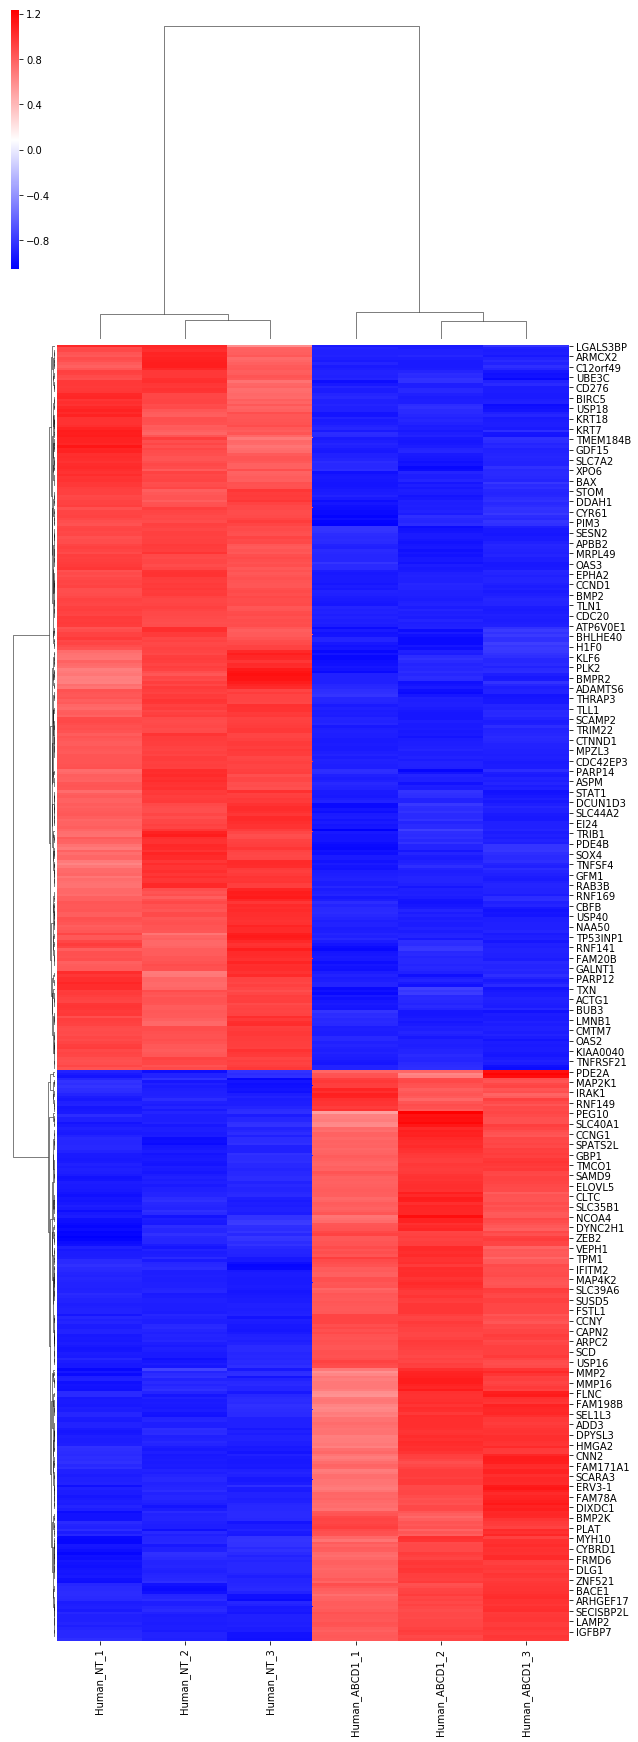

In [6]:
g = sns.clustermap(counts.loc[human[:500]['GeneID'].tolist()], method='complete', cmap='bwr', label='small' ,z_score=0, figsize=(10,30))

## III. Top up and Down Genes

In [8]:
human[human['log2(FC)'] < 0][:100]['GeneID'].values, human[human['log2(FC)'] > 0][:100]['GeneID'].values

(array(['TAGLN2', 'UHMK1', 'RHOB', 'EIF4G1', 'ESM1', 'G3BP1', 'ATP6V0E1',
        'SQSTM1', 'RNF144B', 'YWHAG', 'CAV1', 'ANKRD1', 'SWAP70', 'FZD4',
        'PXN', 'WARS', 'NORAD', 'CSF2RB', 'TMSB4X', 'SAT1', 'APLN',
        'AMOTL2', 'NRG1', 'TNFRSF21', 'RND3', 'TNFRSF10B', 'EPHA2', 'YWHAZ',
        'MPZL3', 'CTTN', 'DCUN1D3', 'GALNT1', 'CCND1', 'TLN1', 'DKK1',
        'PCDH1', 'SDC4', 'GDF15', 'PGF', 'CXorf36', 'CLDN5', 'CENPF',
        'FKBP1A', 'RALBP1', 'FAM124B', 'DOCK9', 'PRRC2B', 'BSG', 'CCNA1',
        'PERP', 'EI24', 'MPZL2', 'TOP2A', 'RASSF3', 'GLT25D1', 'MX1',
        'STOM', 'SF3B3', 'ACTG1', 'STX3', 'SDCBP', 'TRIM22', 'DAB2', 'NTN4',
        'UBA1', 'YES1', 'ZC3H7B', 'BACE2', 'SARAF', 'ZNF106', 'ASPM',
        'IFI6', 'ELMOD1', 'RBMS2', 'PNP', 'BSDC1', 'SCAMP2', 'USP28',
        'CMPK2', 'GPRC5A', 'UBE2L6', 'MDM2', 'SNTB2', 'RAB3B', 'ALDH1A1',
        'CBFB', 'RRP1B', 'UBE2H', 'CBX1', 'FBLIM1', 'VMP1', 'IFITM1',
        'HLA-B', 'RTCB', 'RNF14', 'RSAD2', 'TP53INP1', 'HIST1